In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import json

In [ ]:
I_median=pd.read_csv('Chicago_Data/Index_NonIndex_median_allpercents.csv',index_col=0)
I_wc=pd.read_csv('Chicago_Data/Index_NonIndex_worstcase_allpercents.csv',index_col=0)
V_median=pd.read_csv('Chicago_Data/Violent_NonViolent_median_allpercents.csv',index_col=0)
V_wc=pd.read_csv('Chicago_Data/Violent_NonViolent_worstcase_allpercents.csv',index_col=0)

In [68]:

IM_rts_list=[]
VM_rts_list=[]
IWC_rts_list=[]
VWC_rts_list=[]

for i in I_median.query('percentage == 0.2 and Police==1').index:
    res = json.loads(I_median.loc[i,'RTs'])
    IM_rts_list=IM_rts_list+res
    
for i in V_median.query('percentage == 0.2 and Police==1').index:
    res = json.loads(V_median.loc[i,'RTs'])
    VM_rts_list=VM_rts_list+res
    
for i in I_wc.query('percentage == 0.2 and Police==1').index:
    res = json.loads(I_wc.loc[i,'RTs'])
    IWC_rts_list=IWC_rts_list+res
    
for i in V_wc.query('percentage == 0.2 and Police==1').index:
    res = json.loads(V_wc.loc[i,'RTs'])
    VWC_rts_list=VWC_rts_list+res

In [65]:
IM_rts_list

[7.7209610150745025,
 6.038440727254651,
 4.529151391253558,
 1.730343184162452,
 2.491222488722085,
 7.192889134676329,
 5.343392011632098,
 6.799885356730088,
 4.051610908819765,
 1.6938073993065483,
 2.0108351249580574,
 8.480221332968794,
 4.096093305330136,
 4.1688524488299565,
 6.230285085811576,
 1.7569081113997043,
 1.4052888140479949,
 2.2877314924130387,
 4.520365305031877,
 3.304029291510806,
 5.272645308014467,
 1.816831434004002,
 1.8793368710154474,
 6.921996967701045,
 5.525908695490077,
 2.099689624318044,
 4.298852697379051,
 3.953378403569166,
 5.260851591335579,
 2.1704785812817677,
 2.575147576024955,
 7.920244013073678,
 4.001345893347584,
 4.823793045596332,
 1.5206218076975657,
 1.8936421141585993,
 2.0434482458647647,
 1.225924291945767,
 5.879837697441186,
 1.9399881317807304,
 3.4016429095157026,
 3.422294915928269,
 5.97829371046516,
 6.539721687151257,
 1.5066154448407423,
 3.5976150471621913,
 2.171555109548014,
 2.6212689674027865,
 3.156040675059341,
 4.7

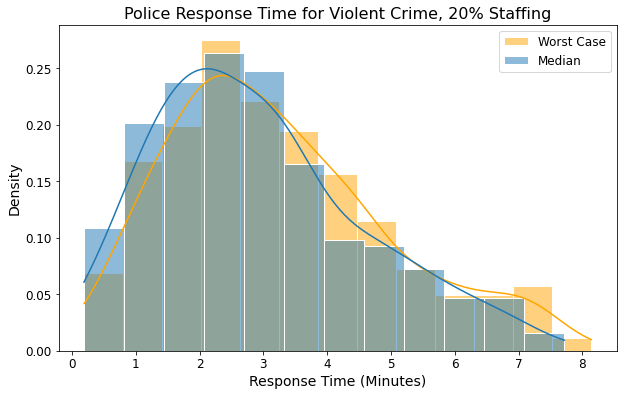

In [73]:
plt.figure(figsize=(10,6))
sns.histplot(VWC_rts_list, kde=True, stat='density', label='Worst Case', color='orange', ec='w');
sns.histplot(VM_rts_list, kde=True, stat='density', label='Median', ec='w');
plt.ylabel('Density',fontsize=14)
plt.xlabel('Response Time (Minutes)',fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Police Response Time for Violent Crime, 20% Staffing',fontsize=16);

plt.legend(fontsize=12);
#plt.savefig('Chicago_Data/Violent_RT_dist_comparison.png')

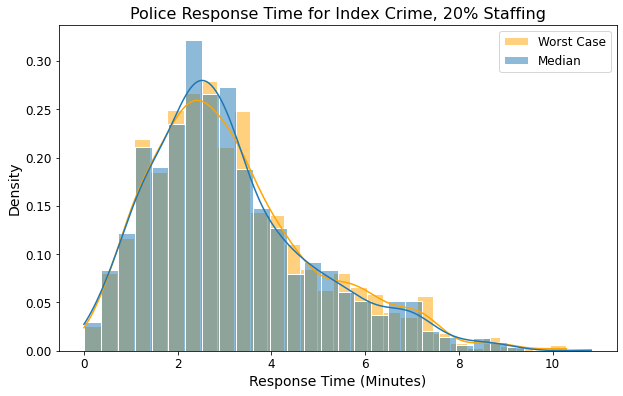

In [74]:
plt.figure(figsize=(10,6))
sns.histplot(IWC_rts_list, kde=True, stat='density', label='Worst Case', color='orange', ec='w');
sns.histplot(IM_rts_list, kde=True, stat='density', label='Median', ec='w');
plt.ylabel('Density',fontsize=14)
plt.xlabel('Response Time (Minutes)',fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Police Response Time for Index Crime, 20% Staffing',fontsize=16);

plt.legend(fontsize=12);
#plt.savefig('Chicago_Data/Index_RT_dist_comparison.png')

In [14]:
I_median.loc[I_median['Police']==1,['percentage','Officers Maxed']].groupby('percentage').sum()

,Officers Maxed
percentage,
0.1,14
0.2,0
0.3,0
0.4,0
0.5,0
0.6,0
0.7,0
0.8,0
0.9,0


In [15]:
I_wc.loc[I_wc['Police']==1,['percentage','Officers Maxed']].groupby('percentage').sum()

,Officers Maxed
percentage,
0.1,62
0.2,0
0.3,0
0.4,0
0.5,0
0.6,0
0.7,0
0.8,0
0.9,0


In [16]:
V_median.loc[V_median['Police']==1,['percentage','Officers Maxed']].groupby('percentage').sum()

,Officers Maxed
percentage,
0.1,0
0.2,0
0.3,0
0.4,0
0.5,0
0.6,0
0.7,0
0.8,0
0.9,0


In [17]:
V_wc.loc[V_wc['Police']==1,['percentage','Officers Maxed']].groupby('percentage').sum()

,Officers Maxed
percentage,
0.1,1
0.2,0
0.3,0
0.4,0
0.5,0
0.6,0
0.7,0
0.8,0
0.9,0


In [90]:
# len_list=[]
# for rt in I_median['RTs'].values:
#     len_list.append(len(rt))
# I_median['#cfs']=len_list

# len_list=[]
# for rt in V_median['RTs'].values:
#     len_list.append(len(rt))
# V_median['#cfs']=len_list

# len_list=[]
# for rt in V_wc['RTs'].values:
#     len_list.append(len(rt))
# V_wc['#cfs']=len_list

In [48]:
# def make_stats_df(df):
#     police=df[df['Police']==1]
#     police_percentage=police[['percentage','RTs']].groupby('percentage').sum()
#     police_percentage=pd.DataFrame(police_percentage.to_dict()['RTs'])
#     return police_percentage

In [22]:
I_median[I_median['Police']==1]

,Mean,Median,Max,Officers Maxed,percentage,Index,Violent,Police,RTs
index_all_data_0.5_0__0.1,3.406114,2.987540,21.922143,1,0.1,1,0,1,"[7.7209610150745025, 6.038440727254651, 4.5291..."
index_all_data_0.5_0__0.2,3.359922,2.987540,9.199006,0,0.2,1,0,1,"[7.7209610150745025, 6.038440727254651, 4.5291..."
index_all_data_0.5_0__0.3,3.359922,2.987540,9.199006,0,0.3,1,0,1,"[7.7209610150745025, 6.038440727254651, 4.5291..."
index_all_data_0.5_0__0.4,3.359922,2.987540,9.199006,0,0.4,1,0,1,"[7.7209610150745025, 6.038440727254651, 4.5291..."
index_all_data_0.5_0__0.5,3.359922,2.987540,9.199006,0,0.5,1,0,1,"[7.7209610150745025, 6.038440727254651, 4.5291..."
index_all_data_0.5_0__0.6,3.359922,2.987540,9.199006,0,0.6,1,0,1,"[7.7209610150745025, 6.038440727254651, 4.5291..."
index_all_data_0.5_0__0.7,3.359922,2.987540,9.199006,0,0.7,1,0,1,"[7.7209610150745025, 6.038440727254651, 4.5291..."
index_all_data_0.5_0__0.8,3.359922,2.987540,9.199006,0,0.8,1,0,1,"[7.7209610150745025, 6.038440727254651, 4.5291..."
index_all_data_0.5_0__0.9,3.359922,2.987540,9.199006,0,0.9,1,0,1,"[7.7209610150745025, 6.038440727254651, 4.5291..."
index_fall_0.5_0__0.1,3.224759,2.829574,29.465009,3,0.1,1,0,1,"[7.364370922241418, 5.706187567574286, 2.17047..."


In [47]:
IM_stats=I_median[I_median['Police']==1][['Mean','Median','Max','percentage']].groupby('percentage').mean()
IWC_stats=I_wc[I_wc['Police']==1][['Mean','Median','Max','percentage']].groupby('percentage').mean()
VM_stats=V_median[V_median['Police']==1][['Mean','Median','Max','percentage']].groupby('percentage').mean()
VWC_stats=V_wc[V_wc['Police']==1][['Mean','Median','Max','percentage']].groupby('percentage').mean()

In [45]:
IM_stats=I_median[I_median['Police']==1][['Mean','Median','Max','percentage']].groupby('percentage').max()
IWC_stats=I_wc[I_wc['Police']==1][['Mean','Median','Max','percentage']].groupby('percentage').max()
VM_stats=V_median[V_median['Police']==1][['Mean','Median','Max','percentage']].groupby('percentage').max()
VWC_stats=V_wc[V_wc['Police']==1][['Mean','Median','Max','percentage']].groupby('percentage').max()

# IM_stats=I_median[I_median['Police']==1][['Mean','Median','Max','percentage']].groupby('percentage').median()
# IWC_stats=I_wc[I_wc['Police']==1][['Mean','Median','Max','percentage']].groupby('percentage').median()
# VM_stats=V_median[V_median['Police']==1][['Mean','Median','Max','percentage']].groupby('percentage').median()
# VWC_stats=V_wc[V_wc['Police']==1][['Mean','Median','Max','percentage']].groupby('percentage').median()

In [21]:
IWC_stats

,Mean,Median,Max
percentage,,,
0.1,3.776458,2.913321,35.092244
0.2,3.178328,2.824468,9.684230
0.3,3.178328,2.824468,9.684230
0.4,3.178328,2.824468,9.684230
0.5,3.178328,2.824468,9.684230
0.6,3.178328,2.824468,9.684230
0.7,3.178328,2.824468,9.684230
0.8,3.178328,2.824468,9.684230
0.9,3.178328,2.824468,9.684230


In [5]:
VWC_stats

,Mean,Median,Max
percentage,,,
0.1,3.261771,2.960277,11.946869
0.2,3.214368,2.953808,7.507380
0.3,3.214368,2.953808,7.507380
0.4,3.214368,2.953808,7.507380
0.5,3.214368,2.953808,7.507380
0.6,3.214368,2.953808,7.507380
0.7,3.214368,2.953808,7.507380
0.8,3.214368,2.953808,7.507380
0.9,3.214368,2.953808,7.507380


/Users/callieclark/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/callieclark/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/callieclark/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

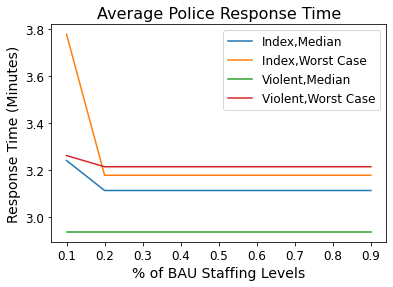

In [48]:
sns.lineplot(IM_stats['Mean'].index,IM_stats['Mean'].values,label='Index,Median')
sns.lineplot(IWC_stats['Mean'].index,IWC_stats['Mean'].values,label='Index,Worst Case')
sns.lineplot(VM_stats['Mean'].index,VM_stats['Mean'].values,label='Violent,Median')
sns.lineplot(VWC_stats['Mean'].index,VWC_stats['Mean'].values,label='Violent,Worst Case')

plt.ylabel('Response Time (Minutes)',fontsize=14)
plt.xlabel('% of BAU Staffing Levels',fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Average Police Response Time',fontsize=16)
plt.legend(fontsize=12);
plt.savefig('Chicago_data/mean_Rt_4scenarios.png')

In [ ]:
#classification of crime doesn't matter 
#RT for Violent crime is longer than index crimes 

/Users/callieclark/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/callieclark/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/callieclark/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

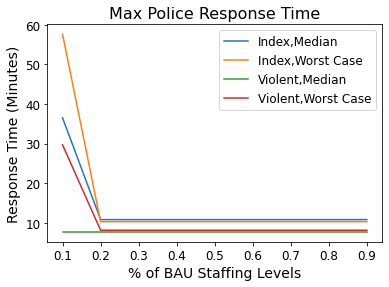

In [46]:
sns.lineplot(IM_stats['Max'].index,IM_stats['Max'].values,label='Index,Median')
sns.lineplot(IWC_stats['Max'].index,IWC_stats['Max'].values,label='Index,Worst Case')
sns.lineplot(VM_stats['Max'].index,VM_stats['Max'].values,label='Violent,Median')
sns.lineplot(VWC_stats['Max'].index,VWC_stats['Max'].values,label='Violent,Worst Case')

plt.ylabel('Response Time (Minutes)',fontsize=14)
plt.xlabel('% of BAU Staffing Levels',fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Max Police Response Time',fontsize=16)
plt.legend(fontsize=12);
plt.savefig('Chicago_data/max_Rt_4scenarios.png')

/Users/callieclark/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/callieclark/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/callieclark/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

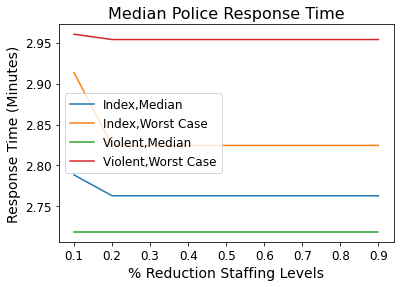

In [42]:
sns.lineplot(IM_stats['Median'].index,IM_stats['Median'].values,label='Index,Median')
sns.lineplot(IWC_stats['Median'].index,IWC_stats['Median'].values,label='Index,Worst Case')
sns.lineplot(VM_stats['Median'].index,VM_stats['Median'].values,label='Violent,Median')
sns.lineplot(VWC_stats['Median'].index,VWC_stats['Median'].values,label='Violent,Worst Case')

plt.ylabel('Response Time (Minutes)',fontsize=14)
plt.xlabel('% of BAU Staffing Levels',fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Median Police Response Time',fontsize=16)
plt.legend(fontsize=12);
plt.savefig('Chicago_data/median_Rt_4scenarios.png')